In [136]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
sns.set() # to set the style

In [159]:
df = pd.read_csv("titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [72]:
connection = sqlite3.connect('titanic.db') # miles per gallons
query = 'SELECT * FROM titanic where survived=1'
df = pd.read_sql(query, connection)
df

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
1,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1
2,3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
3,8,1,3,female,27.0,0,2,11.1333,S,Third,woman,0,None,Southampton,yes,0
4,9,1,2,female,14.0,1,0,30.0708,C,Second,child,0,None,Cherbourg,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,875,1,3,female,15.0,0,0,7.2250,C,Third,child,0,None,Cherbourg,yes,1
338,879,1,1,female,56.0,0,1,83.1583,C,First,woman,0,C,Cherbourg,yes,0
339,880,1,2,female,25.0,0,1,26.0000,S,Second,woman,0,None,Southampton,yes,0
340,887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1


# Q3: Select sex, fare, survived columns

In [97]:
query1 = "SELECT sex, fare, survived FROM titanic "
df1 = pd.read_sql(query1, connection)
df1

,sex,fare,survived
0,male,7.2500,0
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,0
...,...,...,...
886,male,13.0000,0
887,female,30.0000,1
888,female,23.4500,0
889,male,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [103]:
query2 = "SELECT * ,class||' '||embark_town as new_column  FROM titanic "
df2 = pd.read_sql(query2, connection)
df2

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0,Third Southampton
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,First Cherbourg
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1,Third Southampton
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,First Southampton
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1,Third Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,None,Southampton,no,1,Second Southampton
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,First Southampton
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,None,Southampton,no,0,Third Southampton
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,First Cherbourg


# Q5: Remove new_column from the DataFrame

In [107]:
df2.drop(['new_column'],axis=1)

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,None,Southampton,no,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,None,Southampton,no,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1


# Q6: Filter DataFrame for rows of survived Males only 

In [113]:
query3 = "SELECT * FROM titanic where sex='male'"
df3 = pd.read_sql(query3, connection)
df3

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0
1,4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1
2,5,0,3,male,NaN,0,0,8.4583,Q,Third,man,1,None,Queenstown,no,1
3,6,0,1,male,54.0,0,0,51.8625,S,First,man,1,E,Southampton,no,1
4,7,0,3,male,2.0,3,1,21.0750,S,Third,child,0,None,Southampton,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,883,0,2,male,28.0,0,0,10.5000,S,Second,man,1,None,Southampton,no,1
573,884,0,3,male,25.0,0,0,7.0500,S,Third,man,1,None,Southampton,no,1
574,886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,None,Southampton,no,1
575,889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1


,age,class
17,NaN,Second
21,34.0,Second
23,28.0,First
36,NaN,Third
55,NaN,First
...,...,...
838,32.0,Third
839,NaN,First
857,51.0,First
869,4.0,Third


# Q7: The total number of males who survived 

In [180]:
query4 = "SELECT count(sex),survived,sex FROM titanic where survived=1 group by sex "
df4 = pd.read_sql(query4, connection)
df4[df4['sex']=='male']

,count(sex),survived,sex
1,109,1,male


# Q8: How many values in each class?

In [135]:
query5 = "SELECT count(class),class FROM titanic group by class "
df5 = pd.read_sql(query5, connection)
df5

,count(class),class
0,216,First
1,184,Second
2,491,Third


# Import Seaborn

In [141]:
import seaborn as sns

# Q9: Draw barplot represents survived people based on sex

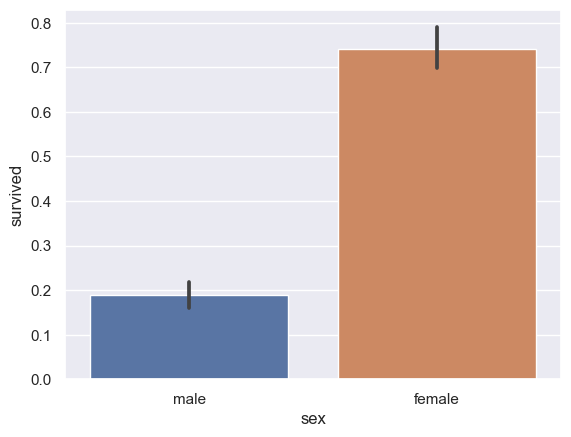

In [160]:

sns.barplot(x='sex',y='survived',data=df);

# Q10: Draw catplot represents survived people based on embarked

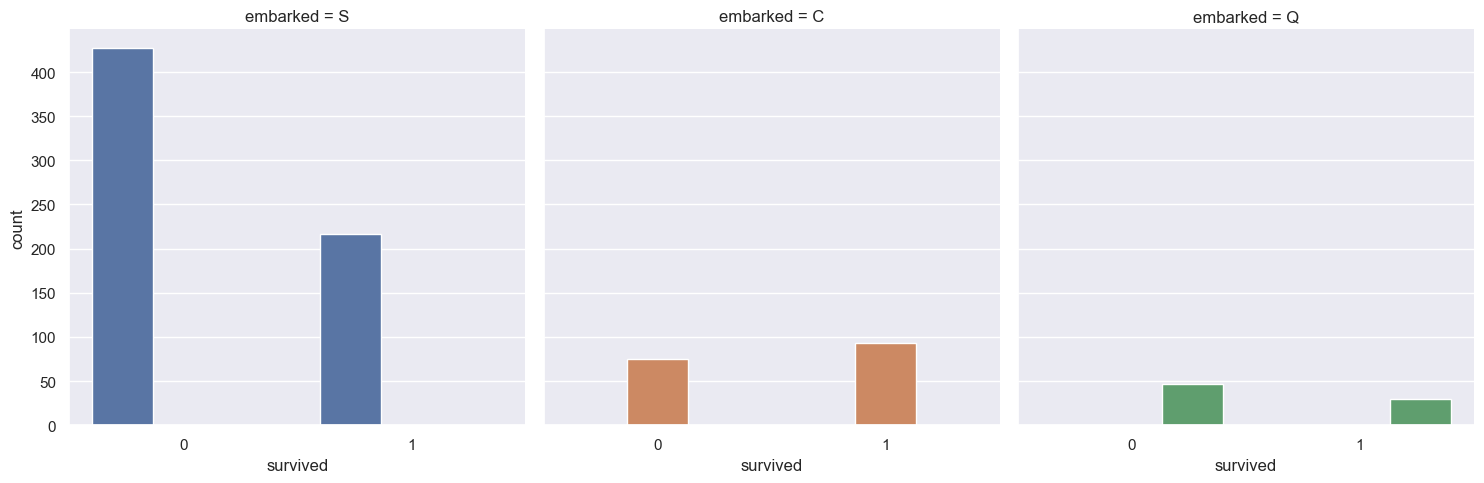

In [198]:

# Countplot
sns.catplot(x ='survived', hue ='embarked',kind ='count', col ='embarked', data = df)

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

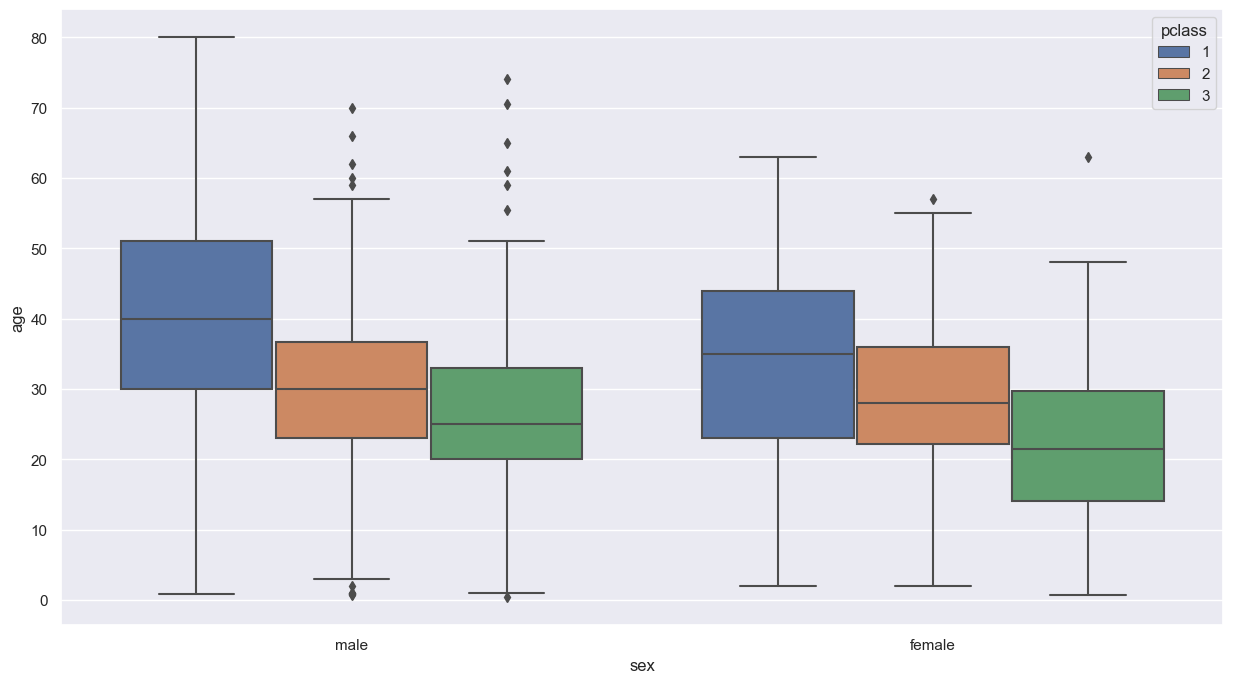

In [201]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x="sex", 
    y="age",
    hue="pclass",
    data=df);


# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

<Axes: >

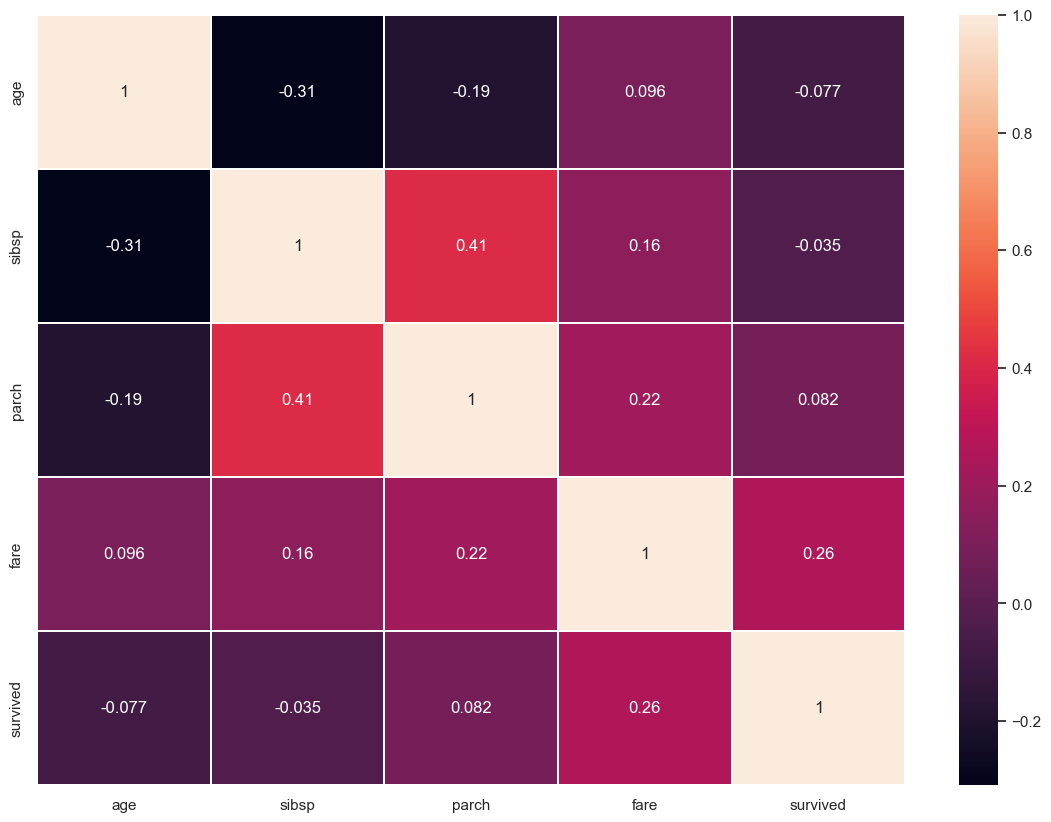

In [225]:
plt.figure(figsize=(14,10))
df_list = df[['age','sibsp','parch','fare','survived']]
sns.heatmap(df_num.corr(), annot=True, linewidths=0.2)

# Q13: Draw factorplot represents the relation between sibsp and survived columns

C:\Users\alban\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


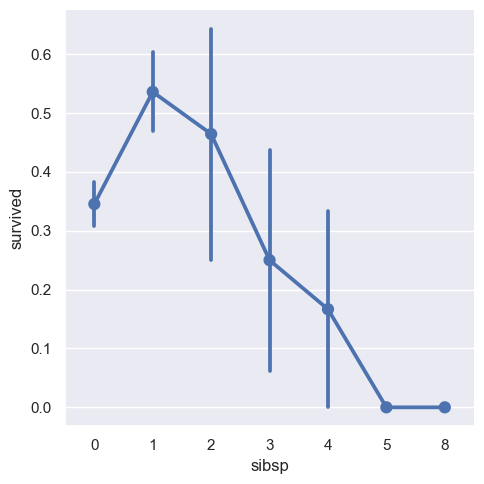

In [229]:
sns.factorplot(x ='sibsp', y ='survived', data = df);

# Q14: Draw extra insights [Optional]

<Axes: xlabel='age', ylabel='Count'>

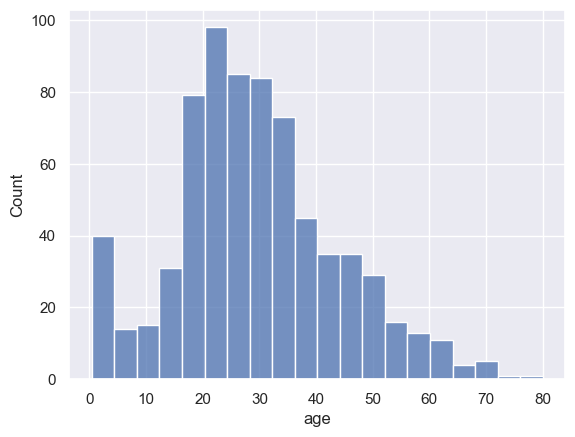

In [230]:
sns.histplot(df["age"], bins=20) 